#### 1 задание (пункт е) $$x^2 - 20 * sin(x) = 0$$  
Имеет 2 корня - около 0 и около 3  

In [97]:
import numpy as np
import matplotlib.pyplot as plt

#### МПИ 1: $$\:x_{n+1} = \sqrt{20 * sin(x_n)}$$
Не сошелся ни у нуля ни у 3 (((

Solution: 3.937543053149296
Solution: 3.716920981297698


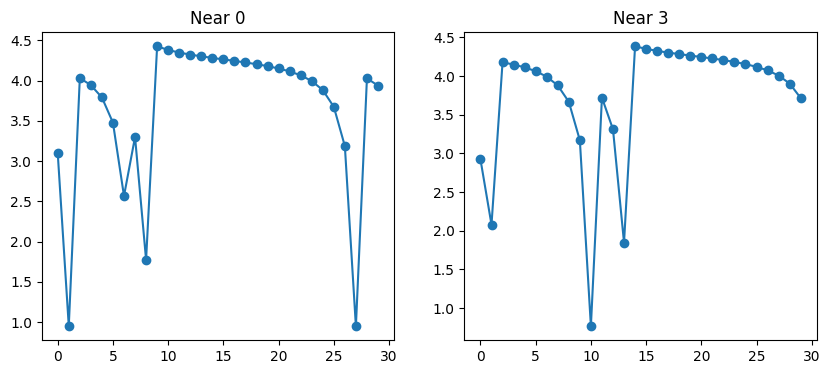

In [98]:
def SIM_1(x_start, iterations):
    x = x_start
    x_list = list()
    for i in range(iterations):
        x = np.sqrt(np.abs(20 * np.sin(x)))
        x_list.append(x)
    return x, x_list

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

x, x_list = SIM_1(0.5, 30)
axs[0].plot(np.arange(len(x_list)), x_list, marker='o')
axs[0].set_title("Near 0")
print("Solution:", x)

x, x_list = SIM_1(2.7, 30)
axs[1].plot(np.arange(len(x_list)), x_list, marker='o')
axs[1].set_title("Near 3")
print("Solution:", x)

#### МПИ 2: $$x_{n+1} = \arcsin(x_n^2 / 20)$$  
Сошелся у 0.  
От 3 тоже сошулся к 0.

Solution: 0.0
Solution: 0.0


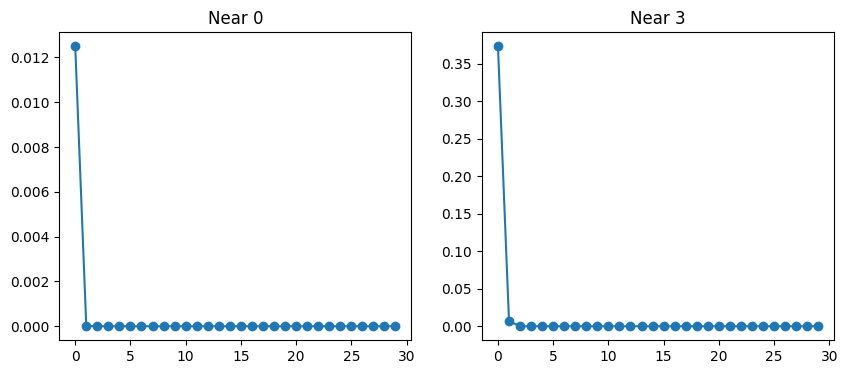

In [99]:
def SIM_2(x_start, iterations):
    x = x_start
    x_list = list()
    for i in range(iterations):
        x = np.arcsin(x**2 / 20)
        x_list.append(x)
    return x, x_list

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

x, x_list = SIM_2(0.5, 30)
axs[0].plot(np.arange(len(x_list)), x_list, marker='o')
axs[0].set_title("Near 0")
print("Solution:", x)

x, x_list = SIM_2(2.7, 30)
axs[1].plot(np.arange(len(x_list)), x_list, marker='o')
axs[1].set_title("Near 3")
print("Solution:", x)

#### МПИ 3: $$x_{n+1} = \arcsin(\frac{x^2 - 5 * sin(x_n)}{15})$$  
Опять сходится только к 0

Solution: 2.1298821097906665e-15
Solution: -4.720540883310944e-15


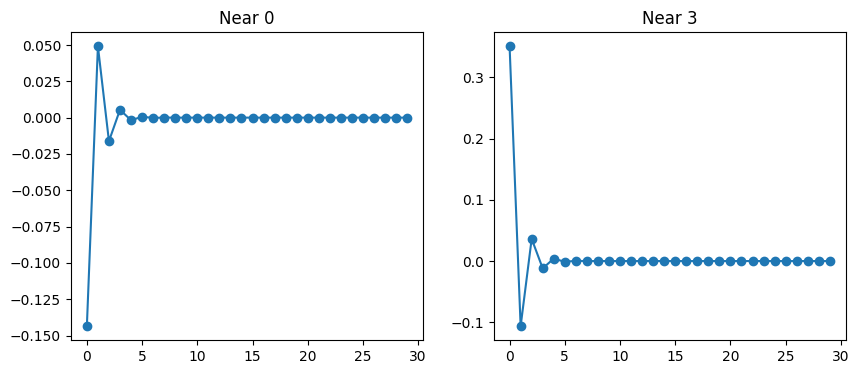

In [100]:
def SIM_3(x_start, iterations):
    x = x_start
    x_list = list()
    for i in range(iterations):
        x = np.arcsin((x**2 - 5 * np.sin(x)) / 15)
        x_list.append(x)
    return x, x_list

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

x, x_list = SIM_3(0.5, 30)
axs[0].plot(np.arange(len(x_list)), x_list, marker='o')
axs[0].set_title("Near 0")
print("Solution:", x)

x, x_list = SIM_3(2.7, 30)
axs[1].plot(np.arange(len(x_list)), x_list, marker='o')
axs[1].set_title("Near 3")
print("Solution:", x)

#### Метод Ньютона: $$\:x_{n+1} = x_n - \frac{x_n^2 - 20 * sin(x_n)} {2 * x_n - 20 * cos(x_n)}$$  
Великолепно нашел оба корня

Solution: 0.0
Solution: 2.7529466338187047


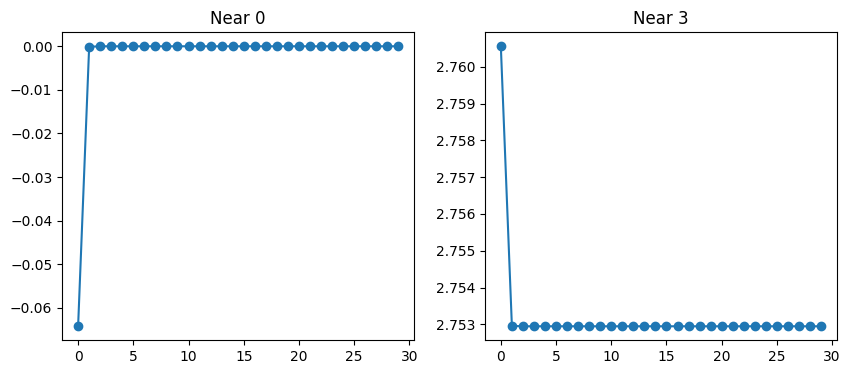

In [101]:
def Newton(x_start, iterations):
    x = x_start
    x_list = list()
    for i in range(iterations):
        x = x - (x**2 - 20 * np.sin(x)) / (2 * x - 20 * np.cos(x))
        x_list.append(x)
    return x, x_list

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

x, x_list = Newton(0.5, 30)
axs[0].plot(np.arange(len(x_list)), x_list, marker='o')
axs[0].set_title("Near 0")
print("Solution:", x)

x, x_list = Newton(3, 30)
axs[1].plot(np.arange(len(x_list)), x_list, marker='o')
axs[1].set_title("Near 3")
print("Solution:", x)

### Итог:

Solution: 2.1298821097906665e-15
Solution: 0.0
Solution: 2.7529466338187047


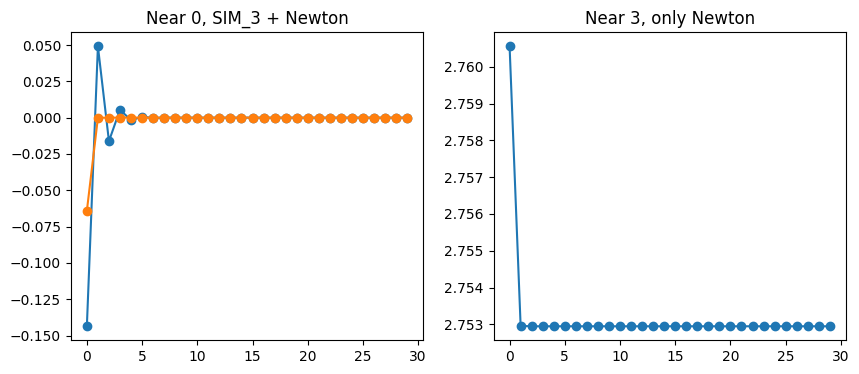

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

x, x_list = SIM_3(0.5, 30)
axs[0].plot(np.arange(len(x_list)), x_list, marker='o')
axs[0].set_title("Near 0, SIM_3 + Newton")
print("Solution:", x)
x, x_list = Newton(0.5, 30)
axs[0].plot(np.arange(len(x_list)), x_list, marker='o')
print("Solution:", x)

x, x_list = Newton(3, 30)
axs[1].plot(np.arange(len(x_list)), x_list, marker='o')
axs[1].set_title("Near 3, only Newton")
print("Solution:", x)

#### 2 задание (пункт а) 
#### $$\sin{(x + 1)} – y = 1.2$$ 
#### $$ 2x + \cos{y} = 2$$   

In [208]:
def Discrepancy(x, y):   # Невязка
    x_0 = 0.5101501574507401
    y_0 = -0.2018384153565739
    return np.abs(x - x_0) + np.abs(y - y_0)

#### МПИ: $$ y_{n+1} = \sin{(x_{n} + 1)} - 1.2$$
#### $$x_{n+1} = 1 - \frac{\cos{y_{n}}}{2}$$   

0.5101501574507401 -0.20183841535657399


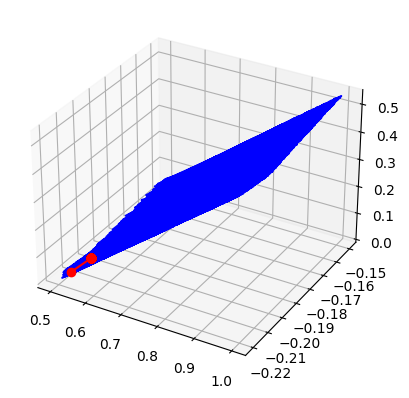

In [209]:
def SIM(x, y, iterations):
    x_list = list()
    y_list = list()

    for i in range(iterations):
        y = np.sin(x + 1) - 1.2
        x = 1 - np.cos(y) / 2

        x_list.append(x)
        y_list.append(y)
    return x, y, x_list, y_list

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

number_of_points = 10000
import random
x = []
y = []
for _ in range(number_of_points):
    x.append(random.uniform(0.5, 1))
    y.append(random.uniform(-0.22, -0.15))
z = [Discrepancy(x[i], y[i]) for i in range(number_of_points)]
ax.plot(x, y, z, color='blue')


# Simple iteration method
x, y, x_list, y_list = SIM(0.4, -0.7, 300)
z_list = np.array([Discrepancy(x_list[i], y_list[i]) for i in range(len(x_list))])
ax.plot(x_list, y_list, z_list, color='red', marker='o')
print(x, y)

0.5101501574507401 -0.2018384153565739


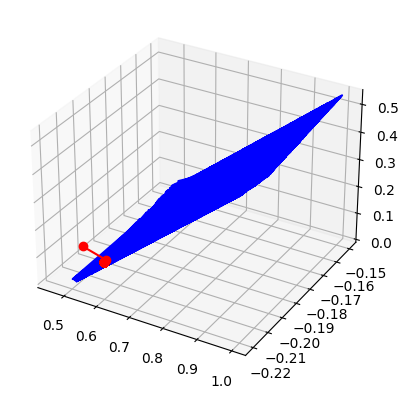

In [206]:
def Newton(x, y, iterations):
    x_list = list()
    y_list = list()
    x_y = np.array([x, y])

    for i in range(iterations):
        J = np.array([[np.cos(x_y[0] + 1), -1], [2, -1 * np.sin(x_y[1])]])
        f = (np.sin(x_y[0] + 1) - x_y[1] - 1.2)
        g = (np.cos(x_y[1]) + 2 * x_y[0] - 2)
        x_y = x_y - np.matmul(np.linalg.inv(J), [f, g])

        x_list.append(x_y[0])
        y_list.append(x_y[1])
    return x_y[0], x_y[1], x_list, y_list

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

number_of_points = 10000
import random
x = []
y = []
for _ in range(number_of_points):
    x.append(random.uniform(0.5, 1))
    y.append(random.uniform(-0.22, -0.15))
z = [Discrepancy(x[i], y[i]) for i in range(number_of_points)]
ax.plot(x, y, z, color='blue')


# Newton method
x, y, x_list, y_list = Newton(0.4, -0.7, 300)
z_list = np.array([Discrepancy(x_list[i], y_list[i]) for i in range(len(x_list))])
ax.plot(x_list, y_list, z_list, color='red', marker='o')
print(x, y)